In [ ]:
%pip install pandas matplotlib

In [2]:
import pandas as pd

df = pd.read_csv('./uploads/Financial.csv')

In [6]:
import numpy as np
import re

def floatable_price_value(key_name):
    df[key_name] = df[key_name].replace(r'[\s\-$()-,]', '', regex=True)
    df[key_name] = pd.to_numeric(df[key_name], downcast='float')
    return df;

old_col = df.columns.tolist()
# replace columns to proper headers, cause normal header has space
new_col = {}
#  loop to append new header
for i in old_col:
    # remove trailing _ and leading _
    new_str = re.sub(r'\s+', '_', i.lstrip('_').rstrip('_'))
    new_col[i] = new_str

# rename column
df.rename(columns=new_col, inplace=True)
def floatable_price_value(key_name):
    df[key_name] = df[key_name].replace(r'[\s\-$()-,]', '', regex=True)
    df[key_name] = pd.to_numeric(df[key_name], downcast='float')
    return df;

floatable_price_value('Profit')
floatable_price_value('Sale_Price')
df['Year_Month'] = df['Year'] + df['Month_Number']*0.1
df1 = df.sort_values(by='Year_Month', ascending=True, inplace=False)

df1

,Segment,Country,Product,Discount_Band,Units_Sold,Manufacturing_Price,Sale_Price,Gross_Sales,Discounts,Sales,COGS,Profit,Date,Month_Number,Month_Name,Year,Year_Month
433,Channel Partners,France,VTT,Medium,2234.0,$250.00,12.0,"$26,808.00","$2,412.72","$24,395.28","$6,702.00",17693.28,9/1/2013,9,September,2013,2013.9
22,Midmarket,France,Paseo,None,549.0,$10.00,15.0,"$8,235.00",$-,"$8,235.00","$5,490.00",2745.00,9/1/2013,9,September,2013,2013.9
532,Enterprise,Mexico,Amarilla,High,947.0,$260.00,125.0,"$118,375.00","$13,021.25","$105,353.75","$113,640.00",8286.25,9/1/2013,9,September,2013,2013.9
500,Channel Partners,Mexico,VTT,High,1005.0,$250.00,12.0,"$12,060.00","$1,326.60","$10,733.40","$3,015.00",7718.40,9/1/2013,9,September,2013,2013.9
338,Small Business,Germany,Paseo,Medium,1123.0,$10.00,300.0,"$336,900.00","$23,583.00","$313,317.00","$280,750.00",32567.00,9/1/2013,9,September,2013,2013.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Enterprise,Canada,VTT,Low,2729.0,$250.00,125.0,"$341,125.00","$6,822.50","$334,302.50","$327,480.00",6822.50,12/1/2014,12,December,2014,2015.2
261,Small Business,Germany,Velo,Medium,1250.0,$120.00,300.0,"$375,000.00","$18,750.00","$356,250.00","$312,500.00",43750.00,12/1/2014,12,December,2014,2015.2
493,Small Business,France,Amarilla,High,853.0,$260.00,300.0,"$255,900.00","$25,590.00","$230,310.00","$213,250.00",17060.00,12/1/2014,12,December,2014,2015.2
130,Channel Partners,Mexico,Velo,Low,1084.0,$120.00,12.0,"$13,008.00",$260.16,"$12,747.84","$3,252.00",9495.84,12/1/2014,12,December,2014,2015.2


** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value
** On entry to DLASCL, parameter number  5 had an illegal value
** On entry to DLASCL, parameter number  4 had an illegal value


LinAlgError: SVD did not converge in Linear Least Squares

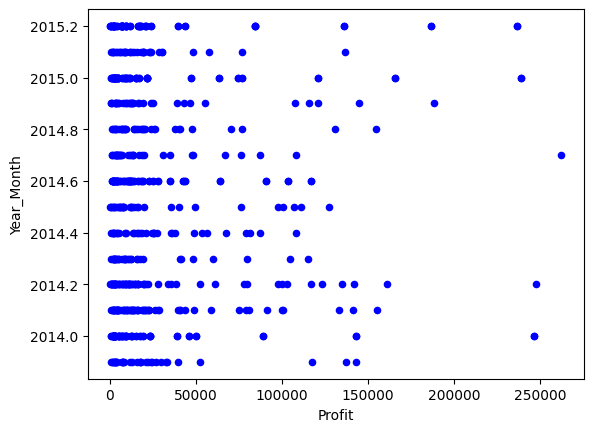

In [7]:
import numpy as np

plotX = 'Profit'
plotY = 'Year_Month';
scatter = df1.plot.scatter(x=plotX, y=plotY, color='blue')
x = np.array(df1[plotX].tolist())
y = np.array(df1[plotY].tolist())

m, b = np.polyfit(x, y, 1)
scatter.plot(x, m*x + b, 'red')